In [1]:
!git clone https://github.com/chupibk/INT3404_1.git

Cloning into 'INT3404_1'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 92 (delta 2), reused 0 (delta 0), pack-reused 57
Unpacking objects: 100% (92/92), done.


# Import libraries and define functions

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def read_and_convert_to_binary(image_path,thresh_hold):
    image = cv2.imread(image_path)
    image_copy = image.copy()
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret,binary = cv2.threshold(image,thresh_hold,255,cv2.THRESH_BINARY)
    return image_copy,binary

In [0]:
def imshow_mask(dilation,mask_label,labels):
    mask = np.zeros_like(dilation, dtype=np.uint8)
    for label in labels:
        mask[mask_label==label] = 255
    plt.imshow(mask, cmap='gray')
    plt.show()
    return mask

In [0]:
def plot_result(image,mask,name):
    mask, contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(image, contours, 0, (0,255,0), 8)
    plt.imshow(image[...,::-1])
    cv2.imwrite(name+".jpg",image)

# Image 1

In [0]:
#image 1
image_path1 = 'homework-data/01.jpg'

In [0]:
image1,binary = read_and_convert_to_binary(image_path1,150)

In [138]:
image1.shape

(3456, 3456, 3)

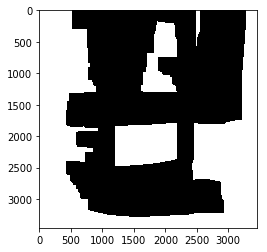

In [139]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(binary,cv2.MORPH_OPEN,kernel)
dilation = cv2.dilate(opening,kernel,iterations=100)
dilation = cv2.erode(dilation,kernel,iterations=100)
plt.imshow(dilation,cmap='gray')

In [140]:
nlabel,labels,stats,centroids = cv2.connectedComponentsWithStats(dilation,connectivity=8)
for i in range(1, nlabel):
    print(stats[i, cv2.CC_STAT_HEIGHT])

3456
575
1137
692


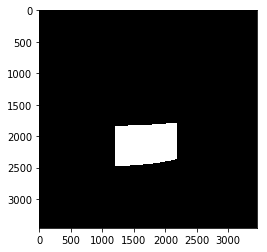

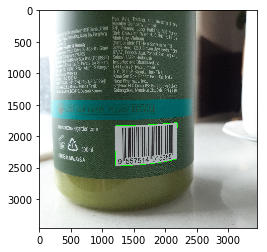

In [141]:
mask = imshow_mask(dilation,labels,[4])
plot_result(image1,mask,'result_01')

# Image2

In [0]:
#image2
image2_path = 'homework-data/02.jpg'

In [0]:
image2,binary2 = read_and_convert_to_binary(image2_path,110)

In [0]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(binary2, cv2.MORPH_OPEN, kernel)
dilation = cv2.erode(opening, kernel, iterations=10)
dilation = 255 - dilation

In [147]:
nlabel,labels,stats,centroids = cv2.connectedComponentsWithStats(dilation,connectivity=8)
for i in range(1, nlabel):
    print(stats[i, cv2.CC_STAT_HEIGHT])

1041
11
132
148
19
3456
133
28
95
32
43
521
111
121
31
34
25
143
127
190
109
58
104
101
117
51
45
23
68
140
153
294
98
70
27
229
155
305
135
145
21
356
132
143
143
138
42
489
116
148
34
334
138
125
103
21
23
134
300
31
28
24
105
41
27
22
146
31
162
35
2306
104
33
28
143
171
137
134
29
101
143
133
25
123
121
122
26
141
131
125
127
21
600
491
483
483
485
188
468
243
25
22
53
21
96
69
99
78
98
95
69
88
21
21
22
22
21
24
21
22
163
30
21
75
25
21
105
53
47
46
688
58
21
28
68
21
89
21
234
21
248
202
21
102
21
12


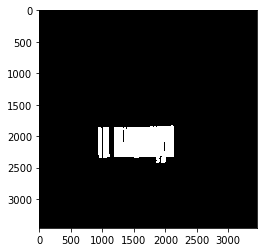

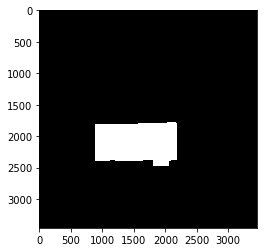

In [154]:
mask = imshow_mask(dilation,labels,[93,94,95,96,97])
mask = cv2.dilate(mask, kernel, iterations=50)
plt.imshow(mask, cmap='gray')

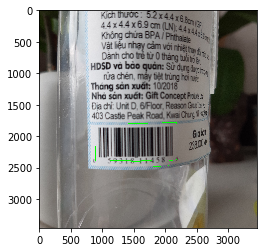

In [155]:
plot_result(image2,mask,'result_02')

# Image3

In [0]:
image3_path = 'homework-data/03.jpg'

In [0]:
image3,binary3 = read_and_convert_to_binary(image3_path,120)

In [0]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(binary3, cv2.MORPH_OPEN, kernel)
dilation = cv2.erode(opening, kernel, iterations=15)
dilation = cv2.dilate(dilation, kernel, iterations=15)
dilation = 255 - dilation

In [171]:
nlabel,labels,stats,centroids = cv2.connectedComponentsWithStats(dilation,connectivity=8)
for i in range(1, nlabel):
    print(stats[i, cv2.CC_STAT_HEIGHT])

3426
1
3
10
1
1
1
5
145
1
30
1
11
3
1
3
1
76
1
1
1
3
1
1
766
1
3
665
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
2
3
9
1
40
1
1
1
7
7
1
1
115
1
437
6
17
1
1
1
1
1
1
1
2
1
2
5
1
3
3
1
58
185
5
3
1
5


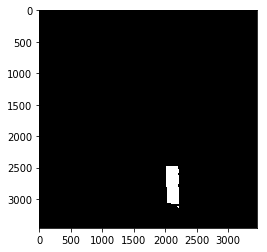

In [172]:
mask = imshow_mask(dilation,labels,[28])

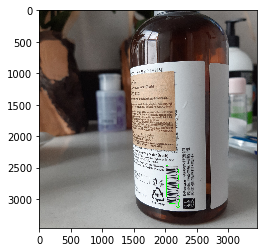

In [173]:
plot_result(image3,mask,'result_03')

# Image4

In [0]:
image4_path = 'homework-data/04.jpg'

In [0]:
image4,binary4 = read_and_convert_to_binary(image4_path,110)

In [0]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(binary4, cv2.MORPH_OPEN, kernel)
dilation = cv2.erode(opening, kernel, iterations=15)
dilation = cv2.dilate(dilation, kernel, iterations=4)
dilation = 255 - dilation
dilation = cv2.erode(dilation, kernel, iterations=1)

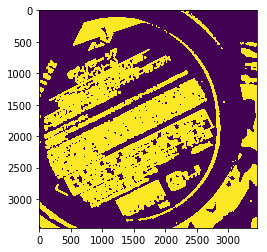

In [180]:
plt.imshow(dilation)

In [178]:
nlabel,labels,stats,centroids = cv2.connectedComponentsWithStats(dilation,connectivity=8)
for i in range(1, nlabel):
    print(stats[i, cv2.CC_STAT_HEIGHT])

560
457
21
25
22
40
2977
83
146
42
38
1321
163
45
134
133
113
21
2185
108
1206
84
21
116
52
23
48
74
75
212
111
21
23
1011
411
21
584
186
26
440
144
223
182
41
21


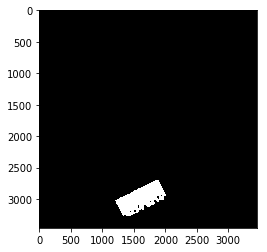

In [181]:
mask = imshow_mask(dilation,labels,[37])

In [0]:
mask = cv2.dilate(mask, kernel, iterations=100)
mask = cv2.erode(mask, kernel, iterations=100)

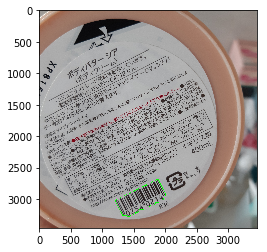

In [184]:
plot_result(image4,mask,'result_04')

# Image 5

In [0]:
image5_path = 'homework-data/05.jpg'

In [0]:
image5,binary5 = read_and_convert_to_binary(image5_path,120)

In [0]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(binary5, cv2.MORPH_OPEN, kernel)
dilation = cv2.erode(opening, kernel, iterations=15)
dilation = cv2.dilate(dilation, kernel, iterations=4)

In [191]:

nlabel,labels,stats,centroids = cv2.connectedComponentsWithStats(dilation,connectivity=8)
for i in range(1, nlabel):
    print(stats[i, cv2.CC_STAT_HEIGHT])

124
338
2395
349
1273
38
20
12
18
780
31
22
15
20
897
9
35
22
18
10
58
123
11
13
185
16
27
29
53
24
46
22
28
18
9
43
15
54
56
36
35
35
33
18
31
11
19
28
29
32
13
33
38
35
46
33
25
31
35
33
30
33
37
33
35
33
9
26
24
27
45
13
11
32
32
9
18
33
9
25
37
38
33
31
41
38
33
32
27
17
35
32
30
10
267
31
36
26
30
28
25
21
33
26
10
20
25
31
26
27
26
25
37
28
17
33
44
30
20
33
27
22
21
25
22
23
533
70
50
60
123
11
9
63
137
59
60
62
62
12
13
890
48
94
69
82
72
30
25
51
27
48
47
18
9
21
30
28
128
19
224
11
16
26
22
10
9
11
30
12
41
9
32
9
60
5


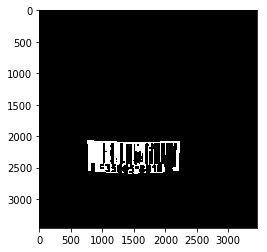

In [194]:
mask = imshow_mask(dilation,labels,[127])

In [0]:
mask = cv2.dilate(mask, kernel, iterations=100)
mask = cv2.erode(mask, kernel, iterations=100)

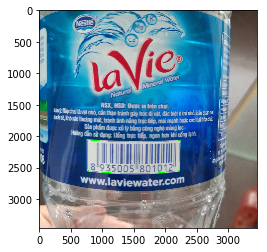

In [196]:
plot_result(image5,mask,'result_05')